# Movie Recommender System

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
column_names=['user_id','item_id','rating','timestamp']
df=pd.read_csv('u.data', sep='\t',names=column_names)
df.drop('timestamp',inplace=True,axis=1)

In [4]:
df.head()

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [5]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
df=pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [8]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [9]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [10]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean().reset_index())
ratings.head()

,title,rating
0,'Til There Was You (1997),2.333333
1,1-900 (1994),2.600000
2,101 Dalmatians (1996),2.908257
3,12 Angry Men (1957),4.344000
4,187 (1997),3.024390


In [11]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title')['rating'].count().reset_index()['rating'])
ratings.head()

,title,rating,num of ratings
0,'Til There Was You (1997),2.333333,9
1,1-900 (1994),2.600000,5
2,101 Dalmatians (1996),2.908257,109
3,12 Angry Men (1957),4.344000,125
4,187 (1997),3.024390,41


<AxesSubplot:>

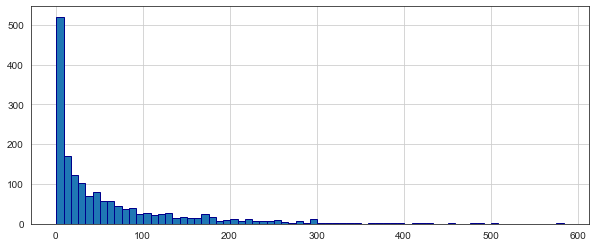

In [12]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70,edgecolor="darkblue")

<AxesSubplot:>

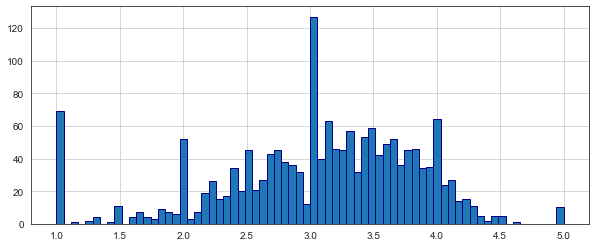

In [13]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70,edgecolor="darkblue")

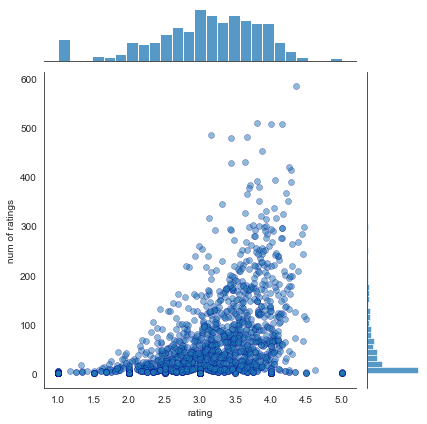

In [14]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5,edgecolor='darkblue')

In [15]:
movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,title,rating,num of ratings
1398,Star Wars (1977),4.359589,584
333,Contact (1997),3.803536,509
498,Fargo (1996),4.155512,508
1234,Return of the Jedi (1983),4.007890,507
860,Liar Liar (1997),3.156701,485
460,"English Patient, The (1996)",3.656965,481
1284,Scream (1996),3.441423,478
1523,Toy Story (1995),3.878319,452
32,Air Force One (1997),3.631090,431
744,Independence Day (ID4) (1996),3.438228,429


In [17]:
starwars_user_ratings = movie_matrix['Star Wars (1977)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [18]:
similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [19]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [20]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation']).reset_index()

In [21]:
corr_starwars

,title,Correlation
0,'Til There Was You (1997),0.872872
1,1-900 (1994),-0.645497
2,101 Dalmatians (1996),0.211132
3,12 Angry Men (1957),0.184289
4,187 (1997),0.027398
...,...,...
1659,Young Guns II (1990),0.228615
1660,"Young Poisoner's Handbook, The (1995)",-0.007374
1661,Zeus and Roxanne (1997),0.818182
1662,unknown,0.723123


In [22]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,title,Correlation
688,Hollow Reed (1996),1.0
326,Commandments (1997),1.0
343,Cosi (1996),1.0
1072,No Escape (1994),1.0
1418,Stripes (1981),1.0
1398,Star Wars (1977),1.0
935,Man of the Year (1995),1.0
137,"Beans of Egypt, Maine, The (1994)",1.0
1091,"Old Lady Who Walked in the Sea, The (Vieille q...",1.0
1114,"Outlaw, The (1943)",1.0


In [23]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,title,Correlation,num of ratings
0,'Til There Was You (1997),0.872872,9
1,1-900 (1994),-0.645497,5
2,101 Dalmatians (1996),0.211132,109
3,12 Angry Men (1957),0.184289,125
4,187 (1997),0.027398,41


In [24]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,title,Correlation,num of ratings
1398,Star Wars (1977),1.000000,584
456,"Empire Strikes Back, The (1980)",0.748353,368
1234,Return of the Jedi (1983),0.672556,507
1205,Raiders of the Lost Ark (1981),0.536117,420
104,Austin Powers: International Man of Mystery (1...,0.377433,130


In [25]:
liarliar_user_ratings=movie_matrix['Liar Liar (1997)']
similar_to_liarliar = movie_matrix.corrwith(liarliar_user_ratings)
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation']).reset_index()
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,title,Correlation,num of ratings
860,Liar Liar (1997),1.000000,485
133,Batman Forever (1995),0.516968,114
950,"Mask, The (1994)",0.484650,129
431,Down Periscope (1996),0.472681,101
327,Con Air (1997),0.469828,137


In [26]:
def movies_recommend(movie_name):
    movie_user_ratings=movie_matrix[movie_name]
    similar_to_movie = movie_matrix.corrwith(movie_user_ratings)
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation']).reset_index()
    corr_movie = corr_movie.join(ratings['num of ratings'])
    result = pd.DataFrame(corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',ascending=False).head())
    print(result)
    str = '\n'.join(result['title'])
    return str

In [27]:
movie_name = 'Batman Forever (1995)'
suggestion = (movies_recommend(movie_name))
suggestion

                          title  Correlation  num of ratings
133       Batman Forever (1995)     1.000000             114
431       Down Periscope (1996)     0.624417             101
794        Jungle2Jungle (1997)     0.611052             132
98    As Good As It Gets (1997)     0.587782             112
1048            Net, The (1995)     0.568909             120


'Batman Forever (1995)\nDown Periscope (1996)\nJungle2Jungle (1997)\nAs Good As It Gets (1997)\nNet, The (1995)'

In [ ]:

import tkinter as tk

class Test():
    def __init__(self):
        self.root = tk.Tk()
        self.root.title("Movie Recommender!")
        self.root.geometry('700x700')
        self.root.configure(background='black')
        self.label = tk.Label(self.root, text="Discover your favourite\n MOVIES\n in a click",fg="red",bg="black",font=("Arial Bold",30))
        self.label1 = tk.Label(self.root, text="Enter your movie",fg="white",bg="black",font=("Arial Bold",20))
        self.label2 = tk.Label(self.root,fg="white",bg="black",font=("Arial Bold",20))
        self.label3 = tk.Label(self.root,text="Welcome user!",fg="white",bg="black",font=("Arial Bold",15))
        self.entry = tk.Entry(self.root, width=60,font=("Arial Bold",10),justify="center")
        self.button = tk.Button(self.root,
                                text="Suggest!",
                                command=self.changeText,bg="red",font=("Arial Bold",10))
        
        self.label.pack(pady=40)
        self.label1.pack(pady=20)
        self.entry.pack(ipady=5)
        self.entry.focus()
        self.button.pack(pady=40,ipady=10,ipadx=10)
        self.label3.pack(pady=5)
        self.label2.pack(pady=20)
        self.root.mainloop()

    def changeText(self):
        movie_name = self.entry.get()#'Batman Forever (1995)'
        suggestion = (movies_recommend(movie_name))
        self.label2.configure(text=suggestion)   
        self.label3.configure(text="Suggestions: ")

app=Test()

                          title  Correlation  num of ratings
133       Batman Forever (1995)     1.000000             114
431       Down Periscope (1996)     0.624417             101
794        Jungle2Jungle (1997)     0.611052             132
98    As Good As It Gets (1997)     0.587782             112
1048            Net, The (1995)     0.568909             120
                             title  Correlation  num of ratings
1500                Titanic (1997)     1.000000             350
1244        River Wild, The (1994)     0.497600             146
16               Abyss, The (1989)     0.472103             151
223   Bram Stoker's Dracula (1992)     0.443560             120
1533              True Lies (1994)     0.435104             208


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\91959\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 2895, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 70, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 101, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 1675, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 1683, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Singham'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\91959\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-28-44d7ad7e88bd>", line 29, in changeText
    suggestion = (movies_recommend(movie_name))
  File "<ipython-input-26-f0be30222714>", 